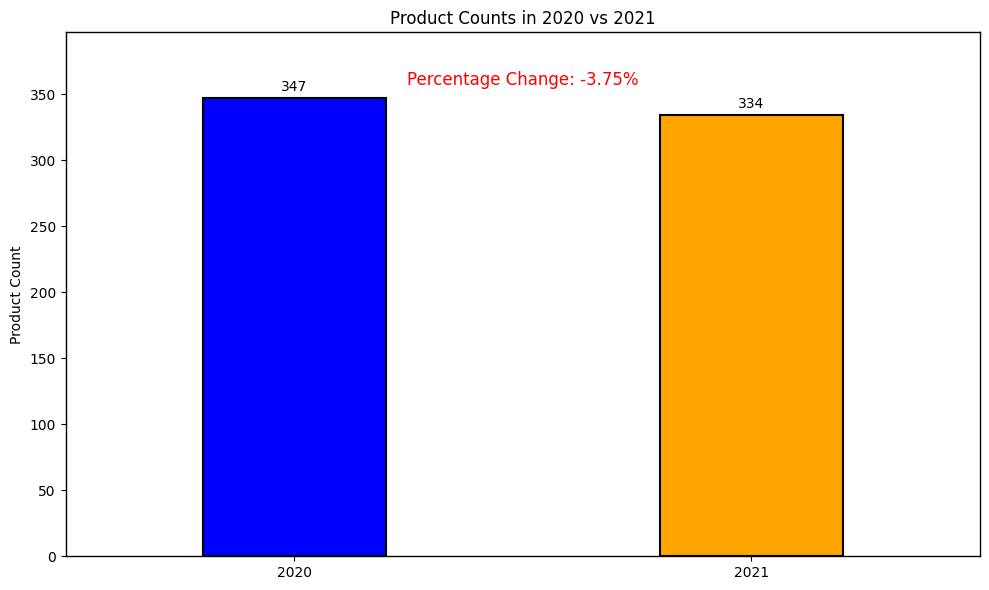

In [1]:

from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt


db_user = 'root'        
db_password = '****'   
db_host = 'localhost'   
db_port = '3306'        
db_name = '****'       

engine = create_engine(f'mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')


query = """
WITH cte1 AS (
    SELECT 
        COUNT(DISTINCT product_code) AS count_2021
    FROM 
        gdb023.fact_sales_monthly
    WHERE 
        YEAR(date) = 2021
),
cte2 AS (
    SELECT 
        COUNT(DISTINCT product_code) AS count_2020
    FROM 
        gdb023.fact_sales_monthly
    WHERE 
        YEAR(date) = 2020
)
SELECT 
    cte1.count_2021, 
    cte2.count_2020,
    ROUND(
        ((cte1.count_2021 - cte2.count_2020) * 100.0 / cte2.count_2020), 2
    ) AS percentage_chg
FROM 
    cte1, cte2;
"""


df = pd.read_sql(query, engine)


count_2020 = df['count_2020'][0]
count_2021 = df['count_2021'][0]
percentage_chg = df['percentage_chg'][0]


fig, ax = plt.subplots(figsize=(10, 6))  


bar_positions = [0, 1]


bars = ax.bar(bar_positions, 
              [count_2020, count_2021], 
              color=['blue', 'orange'], 
              edgecolor='black',  
              linewidth=1.5,      
              width=0.4)          


ax.set_xticks(bar_positions)
ax.set_xticklabels(['2020', '2021'])


ax.set_title('Product Counts in 2020 vs 2021')
ax.set_ylabel('Product Count')


ax.bar_label(bars, labels=[f'{count_2020}', f'{count_2021}'], padding=3)


ax.text(0.5, max(count_2020, count_2021) + 10, 
        f'Percentage Change: {percentage_chg}%', 
        fontsize=12, ha='center', 
        color='green' if percentage_chg >= 0 else 'red')


for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1)        


ax.set_xlim(-0.5, 1.5)


ax.set_ylim(0, max(count_2020, count_2021) + 50)  


plt.tight_layout()
plt.show()
